<a href="https://colab.research.google.com/github/jagsir346/Mini-Project-06-Advance-Python/blob/main/Mini_Project_06_Advance_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance Python Assignment - Complete Solutions

## Part I: Process Automation

### Q1. Create a file that contains 1000 lines of random strings.

In [ ]:

import random, string

def random_string(length=20):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

with open("file_1000_lines.txt", "w") as f:
    for _ in range(1000):
        f.write(random_string() + "\n")


### Q2. Create a file of 5MB with random strings.

In [ ]:

def create_file_of_size(filename, size_mb):
    with open(filename, "w") as f:
        while f.tell() < size_mb * 1024 * 1024:
            f.write(random_string(100) + "\n")

create_file_of_size("file_5MB.txt", 5)


### Q3. Create 10 files of 5MB each with random strings.

In [ ]:

for i in range(1, 11):
    create_file_of_size(f"file_5MB_{i}.txt", 5)


### Q4. Create 5 files of sizes 1GB to 5GB (Commented for safety).

In [ ]:

# for size_gb in range(1, 6):
#     create_file_of_size(f"file_{size_gb}GB.txt", size_gb * 1024)


### Q5. Convert files to uppercase one by one.

In [ ]:

def convert_file_to_uppercase(file_path):
    output_path = file_path.replace(".txt", "_UPPER.txt")
    with open(file_path, "r") as f_in, open(output_path, "w") as f_out:
        for line in f_in:
            f_out.write(line.upper())


### Q6. Convert files to uppercase using multithreading.

In [ ]:

import threading

def convert_files_parallel(filenames):
    threads = []
    for file in filenames:
        t = threading.Thread(target=convert_file_to_uppercase, args=(file,))
        t.start()
        threads.append(t)
    for t in threads:
        t.join()


### Q7. Download 10 cat images from Google Images.

In [ ]:
 #Not secure
 from google_images_search import GoogleImagesSearch

 gis = GoogleImagesSearch('your_dev_api_key', 'your_project_cx')
 _search_params = {'q': 'cat', 'num': 10, 'fileType': 'jpg', 'imgType': 'photo'}
 gis.search(search_params=_search_params, path_to_dir='cat_images')


In [ ]:
#Secure method by using API Key
from google_images_search import GoogleImagesSearch
from google.colab import userdata

# Retrieve API key and CX from Colab's Secrets Manager
API_KEY = userdata.get('GCS_API_KEY')
CX = userdata.get('GCS_CX')

if not API_KEY or not CX:
    print("Please set your GCS_API_KEY and GCS_CX in Colab's Secrets Manager.")
else:
    gis = GoogleImagesSearch(API_KEY, CX)

    search_params = {
        'q': 'cat',
        'num': 10,
        'start': 11,
        'fileType': 'jpg',
        'imgType': 'photo'
    }

    gis.search(search_params=search_params, path_to_dir='cat_images1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Q8. Download 10 videos of 'Machine Learning' from YouTube.

In [ ]:

 #!pip install pytube

 from pytube import Search

 def download_youtube_videos(query, count=1, path="ml_videos"):
     import os
     if not os.path.exists(path): os.makedirs(path)
     videos = Search(query).results[:count]
     for video in videos:
        stream = video.streams.get_highest_resolution()
        print(f"Downloading: {video.title}")
        stream.download(output_path=path)
     print("Download complete!")

### Download youtube videos by pasting link (optional)

In [ ]:
!pip install yt-dlp opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.6 MB/s eta 0:00:00


In [ ]:

import yt_dlp
import os
import cv2

def get_video_resolution(file_path):
    cap = cv2.VideoCapture(file_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

def download_youtube_links(links, path="downloaded_videos"):
    os.makedirs(path, exist_ok=True)

    for i, link in enumerate(links, 2):
        print(f"\n🔗 Downloading ({i}/{len(links)}): {link}")
        file_template = f"{path}/%(title)s.%(ext)s"
        ydl_opts = {
            'outtmpl': file_template,
            'quiet': False,
            #'format': 'bestvideo[height<=1080][ext=mp4]+bestaudio[ext=m4a]/best[height<=1080][ext=mp4]/best',
            #uncomment below and comment above if you want to download 720p or change it as requirement
            'format': 'bestvideo[height=144][ext=mp4]+bestaudio[ext=m4a]/best[height=144][ext=mp4]/best'

        }

        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            try:
                ydl.download([link])
                downloaded_file = file_template.replace("%(ext)s", "mp4")
                if os.path.exists(downloaded_file):
                    w, h = get_video_resolution(downloaded_file)
                    print(f"✅ Saved: {downloaded_file} | Resolution: {w}x{h}")
                else:
                    print("⚠️ Could not find downloaded file.")
            except Exception as e:
                print(f"❌ Error: {e}")


In [ ]:

# Prompt user to enter links (comma-separated)
raw_links = input("Paste YouTube video links separated by commas:\n")
links = [link.strip() for link in raw_links.split(",") if link.strip()]

# Download the videos
download_youtube_links(links)


### Q9. Convert downloaded videos to audio.

In [ ]:
import os
from moviepy.editor import VideoFileClip

video_folder = "downloaded_videos" #OR "ml_videos"
audio_folder = "ml_audio"
os.makedirs(audio_folder, exist_ok=True)

for file in os.listdir(video_folder):
    if file.lower().endswith(".mp4"):
        video_path = os.path.join(video_folder, file)
        base_name = os.path.splitext(file)[0]
        output_path = os.path.join(audio_folder, base_name + ".mp3")

        try:
            clip = VideoFileClip(video_path)
            print(f"🎬 Processing: {file}")

            if clip.audio is not None:
                clip.audio.write_audiofile(output_path)
                print(f"✅ Saved: {output_path}")
            else:
                print(f"⚠️ No audio in {file}, skipping.")

            clip.close()

        except Exception as e:
            print(f"❌ Error processing {file}: {e}")


Q10. Automated pipeline to download 100 videos and convert to audio using multithreading.

In [ ]:
!pip install yt-dlp moviepy
!apt-get install -y ffmpeg


In [ ]:
import os
import re
import threading
from moviepy.editor import VideoFileClip
import yt_dlp

video_dir = "yt_videos"
audio_dir = "yt_audio"
os.makedirs(video_dir, exist_ok=True)
os.makedirs(audio_dir, exist_ok=True)

def safe_filename(name):
    return re.sub(r'[^\w\-_. ]', '_', name).strip()

def download_and_convert(url):
    try:
        # Download the video using yt-dlp
        ydl_opts = {
            'format': 'mp4',
            'outtmpl': os.path.join(video_dir, '%(title)s.%(ext)s'),
            'quiet': True,
        }
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(url, download=True)
            downloaded_path = ydl.prepare_filename(info)  # ✅ This is the actual file path
            title = safe_filename(info['title'])

        # Now convert the actual file
        clip = VideoFileClip(downloaded_path)
        if clip.audio:
            audio_path = os.path.join(audio_dir, title + ".mp3")
            clip.audio.write_audiofile(audio_path, verbose=False, logger=None)
            print(f"✅ Converted: {title}")
        else:
            print(f"⚠️ No audio in: {title}")
        clip.close()

    except Exception as e:
        print(f"❌ Failed to process {url}: {e}")

# ✅ Provide a few URLs manually
video_urls = [
    "https://www.youtube.com/watch?v=dQw4w9WgXcQ",
    "https://www.youtube.com/watch?v=5MgBikgcWnY",
]

# Multithreaded processing
threads = []
for url in video_urls:
    t = threading.Thread(target=download_and_convert, args=(url,))
    t.start()
    threads.append(t)

for t in threads:
    t.join()

print("🎉 All done.")


### Q11. Download 500 dog images and rescale them to 50%.

In [ ]:
!pip install icrawler opencv-python-headless


In [ ]:
import os
import cv2
import time
import hashlib
from icrawler.builtin import BingImageCrawler

# Settings
target_count = 500
download_dir = "dog_images_original"
os.makedirs(download_dir, exist_ok=True)

# Function: Check if image is valid
def is_valid_image(file_path):
    try:
        img = cv2.imread(file_path)
        return img is not None and img.size > 0
    except:
        return False

# Function: Get image hash for duplicate detection
def get_image_hash(file_path):
    try:
        img = cv2.imread(file_path)
        if img is None:
            return None
        return hashlib.md5(img.tobytes()).hexdigest()
    except:
        return None

# Track hashes of valid images
image_hashes = set()
valid_images = set(os.listdir(download_dir))

# Pre-fill image_hashes if folder already has content
for img_name in valid_images:
    path = os.path.join(download_dir, img_name)
    img_hash = get_image_hash(path)
    if img_hash:
        image_hashes.add(img_hash)

print(f"🔍 Already present: {len(valid_images)} images")

# Download loop
attempt = 0
while len(valid_images) < target_count:
    attempt += 1
    print(f"\n⚡ Attempt #{attempt} | Downloading more images...")

    temp_dir = os.path.join(download_dir, "temp")
    os.makedirs(temp_dir, exist_ok=True)

    crawler = BingImageCrawler(storage={'root_dir': temp_dir})
    crawler.crawl(keyword='dog', max_num=100, filters={'size': 'large'})

    for file_name in os.listdir(temp_dir):
        file_path = os.path.join(temp_dir, file_name)

        if not is_valid_image(file_path):
            os.remove(file_path)
            continue

        img_hash = get_image_hash(file_path)
        if not img_hash or img_hash in image_hashes:
            os.remove(file_path)  # skip duplicates
            continue

        # Save unique valid image
        new_name = f"dog_{int(time.time() * 1000)}.jpg"
        new_path = os.path.join(download_dir, new_name)
        os.rename(file_path, new_path)
        valid_images.add(new_name)
        image_hashes.add(img_hash)

    # Clean temp folder
    for f in os.listdir(temp_dir):
        os.remove(os.path.join(temp_dir, f))
    os.rmdir(temp_dir)

    print(f"✅ Total valid, unique images so far: {len(valid_images)}")

print(f"\n🎉 Done! Downloaded {len(valid_images)} unique, valid dog images.")


🔍 Already present: 149 images

⚡ Attempt #1 | Downloading more images...


ERROR:downloader:Response status code 403, file https://www.rd.com/wp-content/uploads/2020/06/GettyImages-185330333-edit.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/36/3c/animal_dog_retriever_pet_canine_domestic_portrait_doggy-762378.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/ec/0e/adorable_animal_breed_canine_cute_dog_domestic_funny-1175745.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/62/5f/dog_puppy_white_sch_fer-1008714.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/8b/50/leonbergers_dog_blond_german_longhaired_pointer_female_pet_fur_animal-1084668.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/78/f7/dog_autumn_hybrid_nature_animal_rest_active_hiking-485576.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/22/08/whippet_canine_dog_sitting_fast_racing_looking_brown-923678.jpg
ERROR:d

✅ Total valid, unique images so far: 149

⚡ Attempt #2 | Downloading more images...


ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/36/3c/animal_dog_retriever_pet_canine_domestic_portrait_doggy-762378.jpg
ERROR:downloader:Response status code 403, file https://www.rd.com/wp-content/uploads/2020/06/GettyImages-185330333-edit.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/ec/0e/adorable_animal_breed_canine_cute_dog_domestic_funny-1175745.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/62/5f/dog_puppy_white_sch_fer-1008714.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/8b/50/leonbergers_dog_blond_german_longhaired_pointer_female_pet_fur_animal-1084668.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/27/a5/small_and_large_two_dogs_welcome_big_and_small_puppy_jack_russel_terrier_golden_retriever_pets-435048.jpg
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/78/f7/dog_autumn_hybrid_nature_an

✅ Total valid, unique images so far: 149

⚡ Attempt #3 | Downloading more images...


KeyboardInterrupt: 

In [ ]:
import os
import hashlib

def get_file_hash(file_path):
    with open(file_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

image_folder = "dog_images_original"
hashes = {}
duplicates = []

for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue
    try:
        file_hash = get_file_hash(file_path)
        if file_hash in hashes:
            duplicates.append((filename, hashes[file_hash]))
        else:
            hashes[file_hash] = filename
    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")

print(f"🔍 Found {len(duplicates)} duplicate images.")
for dup, orig in duplicates[:10]:  # Show first 10 duplicates
    print(f"Duplicate: {dup} → Original: {orig}")


🔍 Found 0 duplicate images.


In [ ]:
import shutil

# Path to the folder you want to delete
folder_path = 'dog_images_resized'

# Delete the folder and all its contents
shutil.rmtree(folder_path)

print(f"🗑️ Deleted folder: {folder_path}")


🗑️ Deleted folder: dog_images_resized


In [ ]:
print("✅ Downloaded images:", len(os.listdir('dog_images_original')))


✅ Downloaded images: 283


In [ ]:
img = cv2.imread("dog_images_resized/000001.jpg")
print("Resized Dimensions:", img.shape)  # (height, width, channels)


Resized Dimensions: (640, 960, 3)


In [ ]:
img = cv2.imread("dog_images_original/000001.jpg")
print("Resized Dimensions:", img.shape)  # (height, width, channels)


Resized Dimensions: (1280, 1920, 3)


## Part II: Data Analytics

### Q12. Random dataset 100x30, NA handling, correlation, normalization.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Generate random 100x30 dataset
np.random.seed(42)
df = pd.DataFrame(np.random.randn(100, 30), columns=[f"F{i+1}" for i in range(30)])

# 2. Randomly insert missing values (~10% missing)
for _ in range(int(df.size * 0.1)):  # ~10% missing
    i = np.random.randint(0, df.shape[0])
    j = np.random.randint(0, df.shape[1])
    df.iat[i, j] = np.nan

print("🔍 Dataset with missing values:")
print(df.head())

# 3. Handle missing values (e.g., fill with column mean)
df_filled = df.fillna(df.mean(numeric_only=True))

print("\n🧹 Missing values handled (mean imputation):")
print(df_filled.isnull().sum().sum(), "NAs remaining")  # should be 0

# 4. Compute correlation matrix
correlation_matrix = df_filled.corr()

print("\n📈 Correlation matrix (first 5 features):")
print(correlation_matrix.iloc[:5, :5])

# 5. Normalize the dataset (0–1 Min-Max scaling)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df.columns)

print("\n📏 Normalized dataset (0–1 range):")
print(df_normalized.head())


🔍 Dataset with missing values:
         F1        F2        F3        F4        F5        F6        F7  \
0       NaN -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
2 -0.479174 -0.185659 -1.106335 -1.196207  0.812526  1.356240 -0.072010   
3  0.097078  0.968645 -0.702053 -0.327662 -0.392108 -1.463515  0.296120   
4  0.791032 -0.909387  1.402794 -1.401851  0.586857  2.190456 -0.990536   

         F8        F9       F10  ...       F21       F22       F23       F24  \
0  0.767435 -0.469474  0.542560  ...  1.465649 -0.225776       NaN -1.424748   
1 -1.959670 -1.328186  0.196861  ...  0.324084       NaN -0.676922  0.611676   
2  1.003533       NaN -0.645120  ... -0.219672  0.357113  1.477894 -0.518270   
3  0.261055  0.005113 -0.234587  ... -1.918771 -0.026514  0.060230  2.463242   
4 -0.566298  0.099651 -0.503476  ...  0.227460  1.307143 -1.607483  0.184634   

        F25       F26       F27      

In [ ]:

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))
df_na = df.mask(df.between(10, 60))
print("Rows with NA:", df_na.isna().any(axis=1).sum())
df_filled = df_na.fillna(df_na.mean())
corr = df_filled.corr(); sns.heatmap(corr); plt.show()
print("Low correlation cols:", corr.columns[(corr <= 0.7).any()])
df_norm = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10
df_bin = df_norm.applymap(lambda x: 1 if x <= 0.5 else 0)


### Q13. Clustering: KMeans & Hierarchical on 500x10 data.

In [ ]:

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
df13 = pd.DataFrame(np.hstack([np.random.uniform(-10, 10, (500, 4)),
                               np.random.uniform(10, 20, (500, 4)),
                               np.random.uniform(-100, 100, (500, 2))]))
inertia = [KMeans(n_clusters=k).fit(df13).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), inertia); plt.title("KMeans Elbow"); plt.show()
linked = linkage(df13, method='ward')
dendrogram(linked, truncate_mode='level', p=5); plt.show()


🔢 Cluster Counts (KMeans):
KMeans_Cluster
1    135
2    127
3    123
0    115
Name: count, dtype: int64

🔢 Cluster Counts (Hierarchical):
Hierarchical_Cluster
1    179
0    159
2    102
3     60
Name: count, dtype: int64


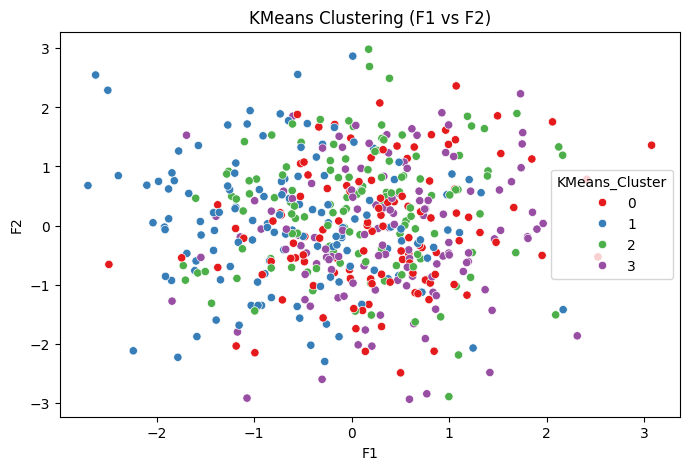

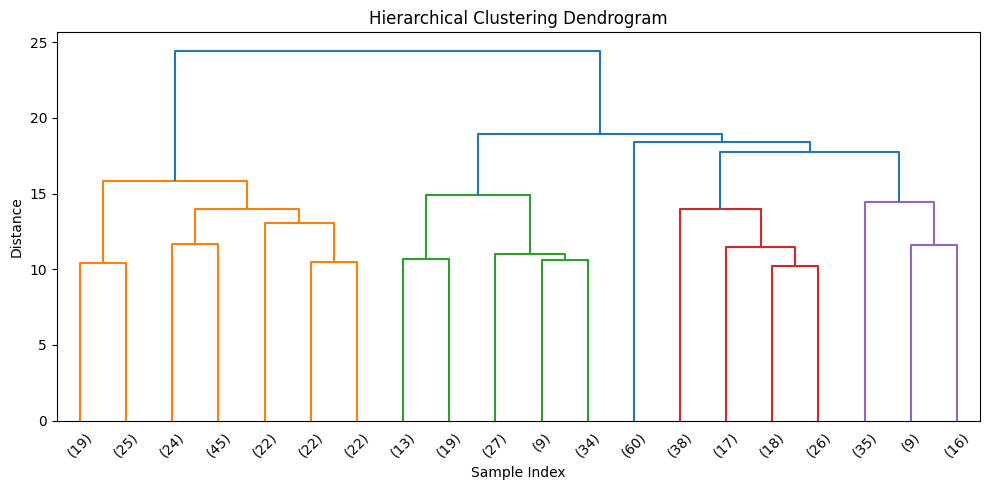

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate random 500x10 dataset
np.random.seed(42)
df = pd.DataFrame(np.random.randn(500, 10), columns=[f"F{i+1}" for i in range(10)])

# 2. Normalize the dataset (standard scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 3. Apply KMeans clustering (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# 4. Apply Agglomerative (Hierarchical) clustering (e.g., 4 clusters)
agg = AgglomerativeClustering(n_clusters=4)
df['Hierarchical_Cluster'] = agg.fit_predict(df_scaled)

# 5. Show cluster distribution
print("🔢 Cluster Counts (KMeans):")
print(df['KMeans_Cluster'].value_counts())
print("\n🔢 Cluster Counts (Hierarchical):")
print(df['Hierarchical_Cluster'].value_counts())

# 6. Optional: Visualize KMeans clusters (first 2 features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['F1'], y=df['F2'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title("KMeans Clustering (F1 vs F2)")
plt.show()

# 7. Optional: Dendrogram for Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


### Q14. Scatter, Histogram, Boxplot on 600x15 data.

In [ ]:

df14 = pd.DataFrame(np.random.uniform(-100, 100, size=(600, 15)))
plt.scatter(df14[4], df14[5]); plt.title("Scatter"); plt.show()
df14.plot(kind='hist', alpha=0.5); plt.title("Histogram"); plt.show()
sns.boxplot(data=df14); plt.title("Boxplot"); plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


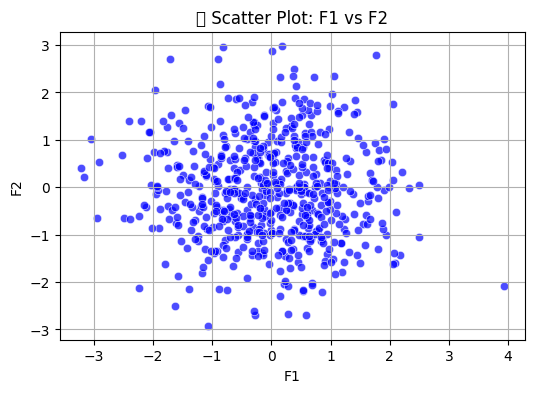

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


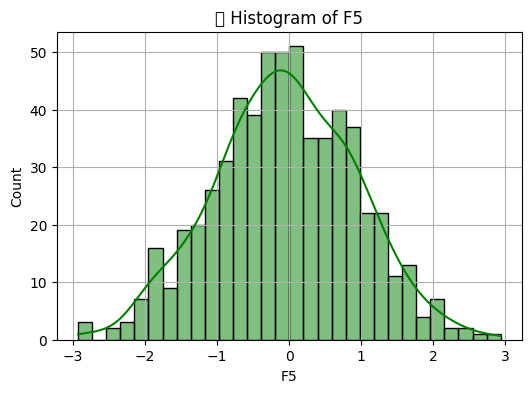

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


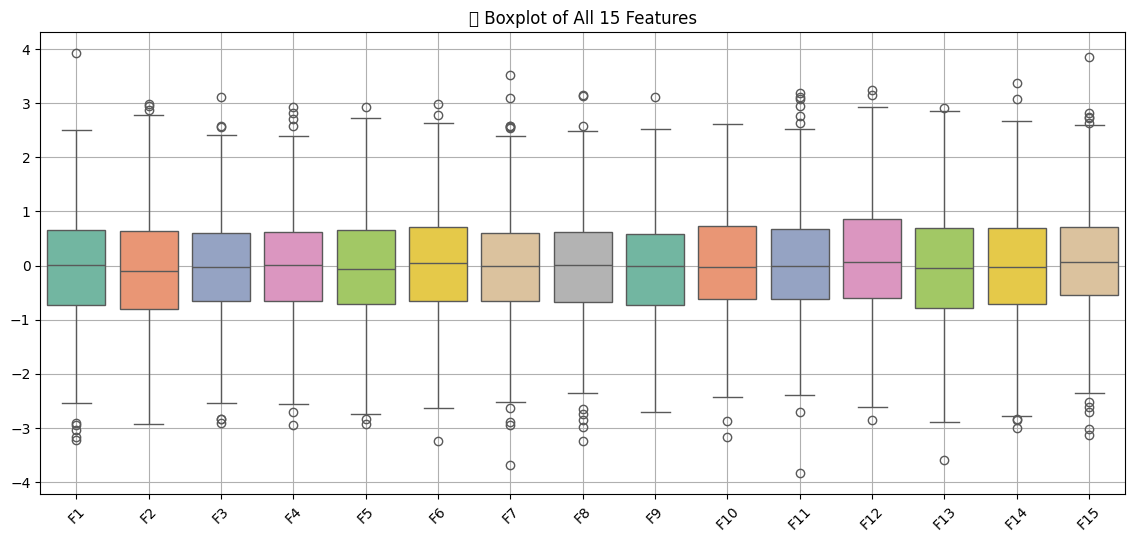

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create random 600x15 dataset
np.random.seed(42)
df = pd.DataFrame(np.random.randn(600, 15), columns=[f"F{i+1}" for i in range(15)])

# 2. SCATTER Plot (F1 vs F2)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='F1', y='F2', data=df, color='blue', alpha=0.7)
plt.title("📌 Scatter Plot: F1 vs F2")
plt.grid(True)
plt.show()

# 3. HISTOGRAM (distribution of F5)
plt.figure(figsize=(6, 4))
sns.histplot(df['F5'], bins=30, kde=True, color='green')
plt.title("📊 Histogram of F5")
plt.grid(True)
plt.show()

# 4. BOXPLOT (all features)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("📦 Boxplot of All 15 Features")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Q15. t-Test, Wilcoxon Test on 500x5 dataset.

In [ ]:

from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums
df15 = pd.DataFrame(np.random.uniform(5, 10, size=(500, 5)))
for col in df15.columns:
    print(f"t-Test Col{col}: ", ttest_1samp(df15[col], 7.5))
    print(f"Wilcoxon Col{col}: ", wilcoxon(df15[col] - 7.5))
print("Two Sample t-Test:", ttest_ind(df15[2], df15[3]))
print("Wilcoxon Rank Sum:", ranksums(df15[2], df15[3]))


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ranksums

# 1. Create random 500x5 dataset
np.random.seed(42)
df = pd.DataFrame(np.random.randn(500, 5), columns=[f'F{i+1}' for i in range(5)])

# 2. Create two groups (split rows: A = first 250, B = last 250)
group_A = df.iloc[:250]
group_B = df.iloc[250:]

# 3. Run t-test and Wilcoxon test for each feature
print("🔬 t-Test and Wilcoxon Test Results:\n")
for col in df.columns:
    # Independent t-test
    t_stat, t_p = ttest_ind(group_A[col], group_B[col], equal_var=False)

    # Wilcoxon rank-sum test (Mann–Whitney U equivalent)
    w_stat, w_p = ranksums(group_A[col], group_B[col])

    print(f"📌 Feature: {col}")
    print(f"   t-Test        → t = {t_stat:.4f}, p = {t_p:.4f}")
    print(f"   Wilcoxon Test → W = {w_stat:.4f}, p = {w_p:.4f}")
    print("-" * 40)


🔬 t-Test and Wilcoxon Test Results:

📌 Feature: F1
   t-Test        → t = -0.6706, p = 0.5028
   Wilcoxon Test → W = -0.8921, p = 0.3724
----------------------------------------
📌 Feature: F2
   t-Test        → t = -0.7819, p = 0.4347
   Wilcoxon Test → W = -0.7385, p = 0.4602
----------------------------------------
📌 Feature: F3
   t-Test        → t = -0.4412, p = 0.6592
   Wilcoxon Test → W = -0.4234, p = 0.6720
----------------------------------------
📌 Feature: F4
   t-Test        → t = 1.7354, p = 0.0833
   Wilcoxon Test → W = 1.5966, p = 0.1104
----------------------------------------
📌 Feature: F5
   t-Test        → t = 0.6694, p = 0.5035
   Wilcoxon Test → W = 0.2173, p = 0.8280
----------------------------------------
